In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_csv('/content/drive/MyDrive/stocks_dataset/Stock_Prediction_Model/all_stocks_5yr.csv')
print(data.shape)
print(data.sample(7))


(619040, 7)
              date    open    high     low   close   volume Name
424330  2014-11-04   33.90   34.05   33.62   33.80  2436557  NWL
192477  2015-06-19   58.89   59.43   58.53   58.61  2303302  EIX
462581  2017-07-18  112.84  112.99  112.12  112.95   826464  PPG
485751  2013-11-07   45.95   46.00   44.81   44.87   601059  RJF
442954  2014-08-06   34.53   34.57   34.05   34.15  6704547  PEG
8382    2016-05-24  116.58  119.21  116.58  119.12  2066413  ACN
18669   2017-03-31   67.08   67.51   67.07   67.13  2260376  AEP


In [12]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [13]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


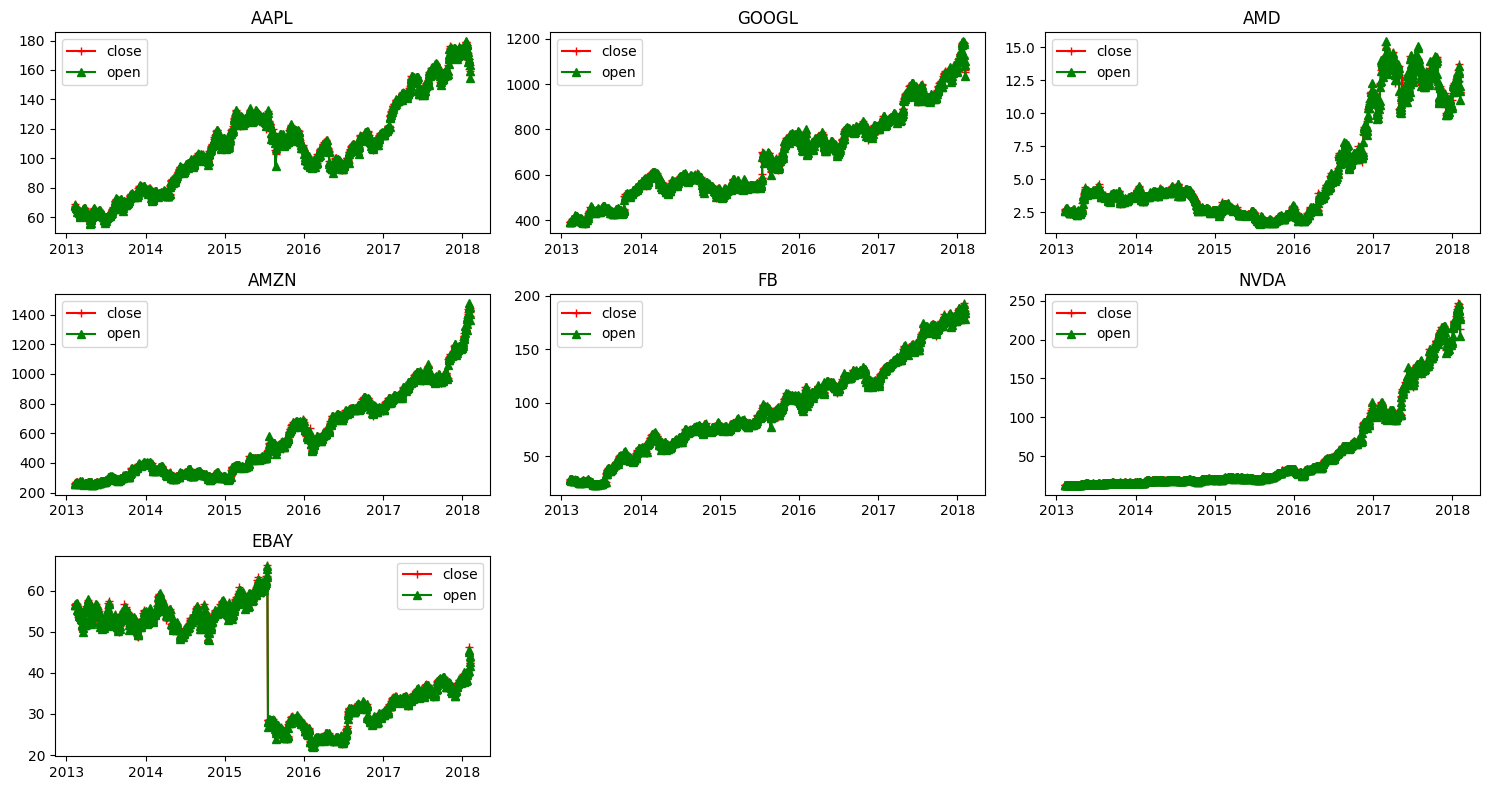

In [15]:
data['date'] = pd.to_datetime(data['date'])
# date vs open
# date vs close
companies = ['AAPL', 'GOOGL', 'AMD', 'AMZN', 'FB', 'NVDA','EBAY']  # Replace with your actual company names

# Assuming you have loaded your data into the 'data' DataFrame
data['date'] = pd.to_datetime(data['date'])

# Create subplots for each company
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

# Display the plots
plt.show()


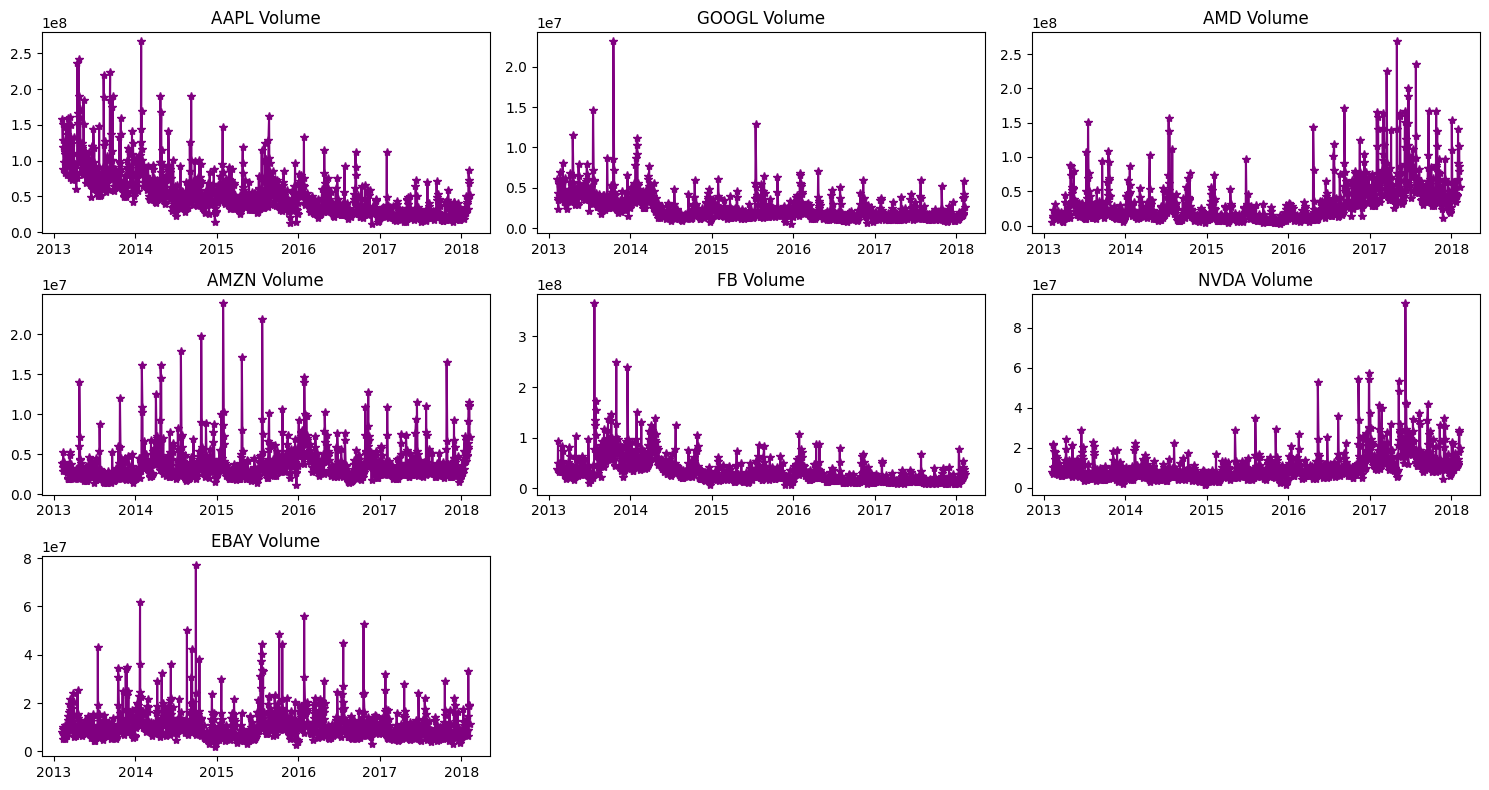

In [16]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['volume'], c='purple', marker='*')
	plt.title(f"{company} Volume")
	plt.tight_layout()


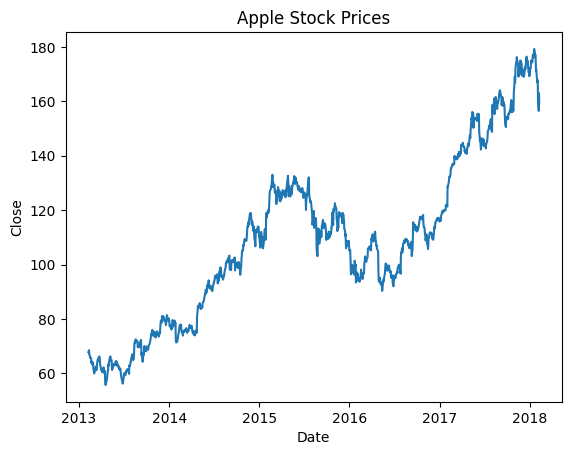

In [18]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
& (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [19]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)


1197


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [21]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7b77ad033d30>>

In [22]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)


Epoch 1/10
36/36 [==============================] - 9s 77ms/step - loss: 0.0397
Epoch 2/10
36/36 [==============================] - 3s 83ms/step - loss: 0.0098
Epoch 3/10
36/36 [==============================] - 4s 120ms/step - loss: 0.0089
Epoch 4/10
36/36 [==============================] - 3s 86ms/step - loss: 0.0083
Epoch 5/10
36/36 [==============================] - 3s 76ms/step - loss: 0.0078
Epoch 6/10
36/36 [==============================] - 3s 75ms/step - loss: 0.0081
Epoch 7/10
36/36 [==============================] - 3s 77ms/step - loss: 0.0072
Epoch 8/10
36/36 [==============================] - 5s 129ms/step - loss: 0.0074
Epoch 9/10
36/36 [==============================] - 3s 84ms/step - loss: 0.0074
Epoch 10/10
36/36 [==============================] - 3s 77ms/step - loss: 0.0066


In [23]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


2/2 [==============================] - 2s 24ms/step
MSE 44.88480747650188
RMSE 6.6996124870399685


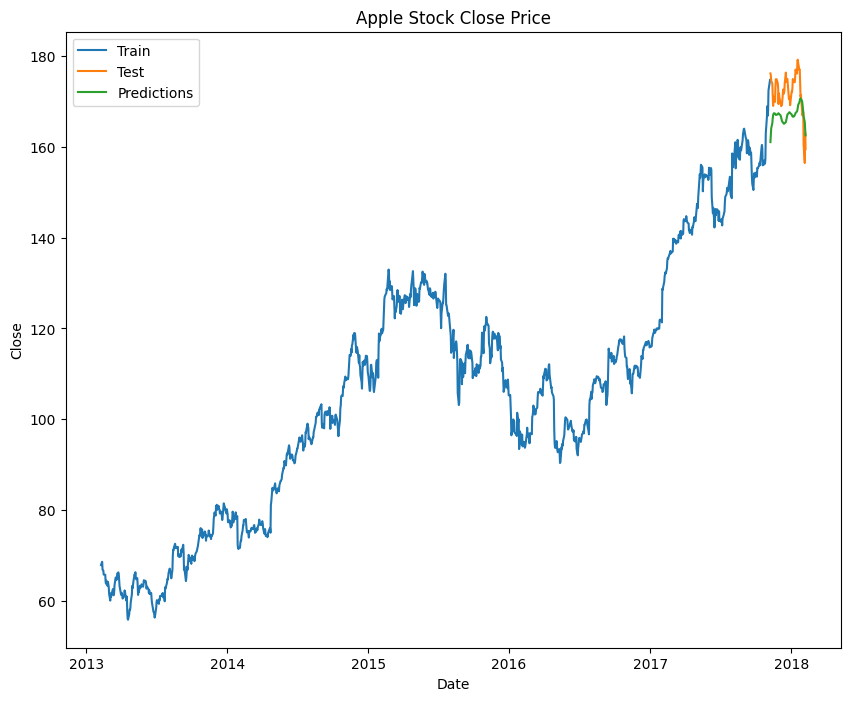

In [28]:

ptrain = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title("Apple Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

